# Predictive Modeling of Student Dropout Rates in New York State School Districts
Introduction
The goal of this project is to develop a predictive model to estimate student dropout rates in New York State school districts for the 2018-2019 academic year. Using a comprehensive dataset, the project aims to identify key predictors and deploy suitable statistical modeling techniques to achieve accurate predictions. The data science lifecycle adopted for this project includes several stages:

Data Loading and Preliminary Analysis: Load data from a public source and perform an initial examination to understand the structure and content.
Exploratory Data Analysis (EDA): Delve deeper into the dataset to uncover patterns, anomalies, missing values, and the basic characteristics of the data.
Data Cleaning and Transformation: Convert percentage strings to floats, handle missing values, and adjust data types appropriately for analytical processing.
Feature Engineering: Select features based on their potential impact on dropout rates, utilizing both domain knowledge and insights gained from EDA.
Model Building: Develop multiple regression models, including linear and Poisson regression models, to identify the best predictor of dropout rates.
Model Evaluation and Selection: Employ cross-validation and R-squared metrics to compare models and select the most effective one.
Model Selection Overview
Through rigorous testing and evaluation, the project compared multiple models:

Multiple Linear Regression: Tested different combinations of features with cross-validation to find the model with the highest explanatory power.
Poisson Regression Models: Assessed both standard and zero-inflated Poisson models to manage count data typical of dropout counts.
Negative Binomial Regression: Evaluated due to its effectiveness in handling over-dispersed count data compared to the simpler Poisson models.
Conclusion and Selection
The second multiple linear regression model emerged as the most effective, demonstrating robust predictive performance with an R-squared score of 0.79. It outperformed the other models in terms of simplicity and accuracy, making it the preferred choice for stakeholders looking to understand and mitigate student dropouts in New York State schools.

This project highlights the importance of a methodical approach in predictive modeling, from understanding the dataset to selecting the appropriate models based on statistical evidence and practical applicability. The selected model provides a valuable tool for educational authorities to anticipate and address dropout issues proactively.

The primary objective of this project is to predict the number of student dropouts in New York State school districts for the 2018-2019 school year. This prediction will be based on various attributes available in the dataset.
- To address this problem, we will follow a structured data science project lifecycle, which includes the following steps:
1. Data Loading 
2. Exploratory Data Analysis (EDA)
3. Data Preparation
4. Feature Selection
5. Regression Modeling
6. Model Evaluation
7. Model Selection
8. Conclusions

In [1]:
#Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns

data = pd.read_csv("https://raw.githubusercontent.com/Pratibhabhalerao080/DAV-6150/main/Project1_Data.csv")

In [2]:
data.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,6%,10,3%,18,5%,0,0%,91,25%


# Exploratory Data Analysis

In [3]:
data.shape

(73152, 29)

In [4]:
#Check for missing values and display summary statistics for numeric columns

data.isnull().sum()

report_school_year            0
aggregation_index             0
aggregation_type              0
aggregation_name              0
nrc_code                      0
nrc_desc                      0
county_code                   0
county_name                   0
nyc_ind                       0
membership_desc               0
subgroup_code                 0
subgroup_name                 0
enroll_cnt                    0
grad_cnt                      0
grad_pct                      0
local_cnt                     0
local_pct                     0
reg_cnt                       0
reg_pct                       0
reg_adv_cnt                   0
reg_adv_pct                   0
non_diploma_credential_cnt    0
non_diploma_credential_pct    0
still_enr_cnt                 0
still_enr_pct                 0
ged_cnt                       0
ged_pct                       0
dropout_cnt                   0
dropout_pct                   0
dtype: int64

In [5]:
data.describe()

,aggregation_index,nrc_code,county_code,nyc_ind,subgroup_code
count,73152.0,73152.000000,73152.000000,73152.000000,73152.000000
mean,3.0,4.588583,36.251859,0.055255,12.000930
std,0.0,1.203507,20.588044,0.228479,7.213138
min,3.0,1.000000,1.000000,0.000000,1.000000
25%,3.0,4.000000,17.000000,0.000000,6.000000
50%,3.0,5.000000,40.000000,0.000000,11.000000
75%,3.0,5.000000,57.000000,0.000000,18.000000
max,3.0,6.000000,68.000000,1.000000,25.000000


In [6]:
data.corr()

,aggregation_index,nrc_code,county_code,nyc_ind,subgroup_code
aggregation_index,NaN,NaN,NaN,NaN,NaN
nrc_code,NaN,1.000000,0.155944,-0.721116,-0.001332
county_code,NaN,0.155944,1.000000,-0.041471,-0.003399
nyc_ind,NaN,-0.721116,-0.041471,1.000000,-0.012789
subgroup_code,NaN,-0.001332,-0.003399,-0.012789,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          73152 non-null  object
 1   aggregation_index           73152 non-null  int64 
 2   aggregation_type            73152 non-null  object
 3   aggregation_name            73152 non-null  object
 4   nrc_code                    73152 non-null  int64 
 5   nrc_desc                    73152 non-null  object
 6   county_code                 73152 non-null  int64 
 7   county_name                 73152 non-null  object
 8   nyc_ind                     73152 non-null  int64 
 9   membership_desc             73152 non-null  object
 10  subgroup_code               73152 non-null  int64 
 11  subgroup_name               73152 non-null  object
 12  enroll_cnt                  73152 non-null  object
 13  grad_cnt                    73152 non-null  ob

In [8]:
#I can see there are some columns which contain value in %, we need to find those columns and convert it into numeric value for better understanding
potential_percentage_columns = []

for column in data.columns:
    if data[column].astype(str).str.contains('%').any():
        potential_percentage_columns.append(column)

print("Potential percentage columns:", potential_percentage_columns)


Potential percentage columns: ['grad_pct', 'local_pct', 'reg_pct', 'reg_adv_pct', 'non_diploma_credential_pct', 'still_enr_pct', 'ged_pct', 'dropout_pct']


In [9]:
#convert the identified columns into numeric value
for column in potential_percentage_columns:
    data[column] = data[column].str.rstrip('%').replace('-', '0').astype(float) / 100

In [10]:
data.dtypes

report_school_year             object
aggregation_index               int64
aggregation_type               object
aggregation_name               object
nrc_code                        int64
nrc_desc                       object
county_code                     int64
county_name                    object
nyc_ind                         int64
membership_desc                object
subgroup_code                   int64
subgroup_name                  object
enroll_cnt                     object
grad_cnt                       object
grad_pct                      float64
local_cnt                      object
local_pct                     float64
reg_cnt                        object
reg_pct                       float64
reg_adv_cnt                    object
reg_adv_pct                   float64
non_diploma_credential_cnt     object
non_diploma_credential_pct    float64
still_enr_cnt                  object
still_enr_pct                 float64
ged_cnt                        object
ged_pct     

In [11]:
#There are null columns whose value in '-', replace it with nan to identify null columns
import numpy as np

data.replace('-', np.nan, inplace=True)


In [12]:
data.isnull().sum()

report_school_year                0
aggregation_index                 0
aggregation_type                  0
aggregation_name                  0
nrc_code                          0
nrc_desc                          0
county_code                       0
county_name                       0
nyc_ind                           0
membership_desc                   0
subgroup_code                     0
subgroup_name                     0
enroll_cnt                    33478
grad_cnt                      33478
grad_pct                          0
local_cnt                     33478
local_pct                         0
reg_cnt                       33478
reg_pct                           0
reg_adv_cnt                   33478
reg_adv_pct                       0
non_diploma_credential_cnt    33478
non_diploma_credential_pct        0
still_enr_cnt                 33478
still_enr_pct                     0
ged_cnt                       33478
ged_pct                           0
dropout_cnt                 

Columns with missing values appear to represent counts and percentages for different subgroupings, it seems appropriate to handle the missing values in the following columns using median imputation

In [13]:
columns_with_missing = ['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt', 'reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt', 'dropout_cnt']

for column in columns_with_missing:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)


In [14]:
data.isnull().sum()

report_school_year            0
aggregation_index             0
aggregation_type              0
aggregation_name              0
nrc_code                      0
nrc_desc                      0
county_code                   0
county_name                   0
nyc_ind                       0
membership_desc               0
subgroup_code                 0
subgroup_name                 0
enroll_cnt                    0
grad_cnt                      0
grad_pct                      0
local_cnt                     0
local_pct                     0
reg_cnt                       0
reg_pct                       0
reg_adv_cnt                   0
reg_adv_pct                   0
non_diploma_credential_cnt    0
non_diploma_credential_pct    0
still_enr_cnt                 0
still_enr_pct                 0
ged_cnt                       0
ged_pct                       0
dropout_cnt                   0
dropout_pct                   0
dtype: int64

In [15]:
data.head()


,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,0.14,16,0.02,30,0.05,0,0.0,148,0.22
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,0.15,2,0.01,11,0.03,0,0.0,65,0.20
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,0.13,14,0.04,19,0.06,0,0.0,83,0.25
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,18.0,0.00,0.0,0.00,2.0,0.00,0.0,0.0,3.0,0.00
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,0.06,10,0.03,18,0.05,0,0.0,91,0.25


In [16]:
#For further analysis changing data type of numerical columne, object to numeric
count_columns = ['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt', 'reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt','dropout_cnt']
data[count_columns] = data[count_columns].astype(float)


In [17]:
data.dtypes

report_school_year             object
aggregation_index               int64
aggregation_type               object
aggregation_name               object
nrc_code                        int64
nrc_desc                       object
county_code                     int64
county_name                    object
nyc_ind                         int64
membership_desc                object
subgroup_code                   int64
subgroup_name                  object
enroll_cnt                    float64
grad_cnt                      float64
grad_pct                      float64
local_cnt                     float64
local_pct                     float64
reg_cnt                       float64
reg_pct                       float64
reg_adv_cnt                   float64
reg_adv_pct                   float64
non_diploma_credential_cnt    float64
non_diploma_credential_pct    float64
still_enr_cnt                 float64
still_enr_pct                 float64
ged_cnt                       float64
ged_pct     

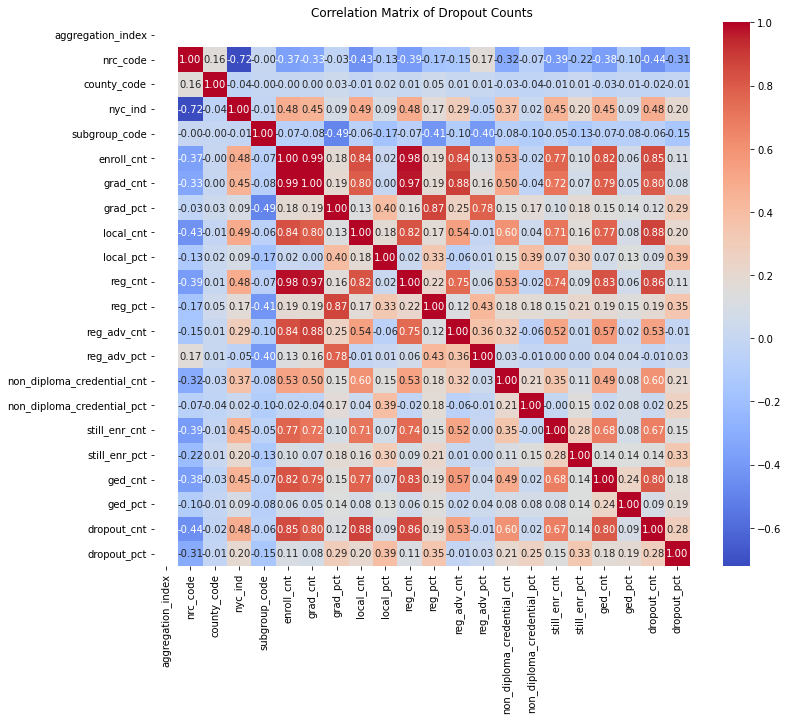

In [18]:
# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Dropout Counts')
plt.show()

In [19]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Get the correlation values for 'dropout_cnt' with other columns
dropout_corr = correlation_matrix['dropout_cnt']

# Print the correlation values
print(dropout_corr)

aggregation_index                  NaN
nrc_code                     -0.444309
county_code                  -0.024631
nyc_ind                       0.479934
subgroup_code                -0.059620
enroll_cnt                    0.851733
grad_cnt                      0.802668
grad_pct                      0.119859
local_cnt                     0.875001
local_pct                     0.089158
reg_cnt                       0.855643
reg_pct                       0.186651
reg_adv_cnt                   0.526670
reg_adv_pct                  -0.009775
non_diploma_credential_cnt    0.598774
non_diploma_credential_pct    0.024875
still_enr_cnt                 0.671444
still_enr_pct                 0.143236
ged_cnt                       0.799996
ged_pct                       0.092240
dropout_cnt                   1.000000
dropout_pct                   0.284110
Name: dropout_cnt, dtype: float64


In [20]:
# Calculate the correlation between 'enroll_cnt' and 'dropout_cnt'
enroll_dropout_corr = data['enroll_cnt'].corr(data['dropout_cnt'])

# Print the correlation value
print(f"Correlation between 'enroll_cnt' and 'dropout_cnt': {enroll_dropout_corr:.2f}")

Correlation between 'enroll_cnt' and 'dropout_cnt': 0.85


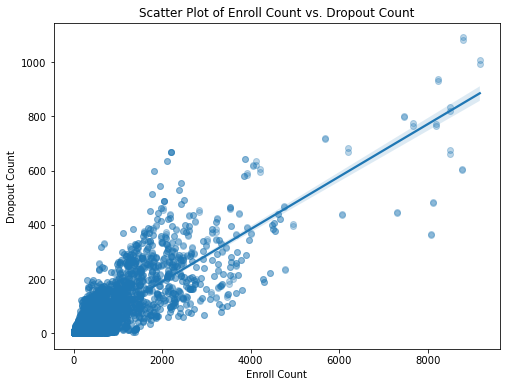

In [21]:
# Plotting
plt.figure(figsize=(8, 6))
# Use 'astype(float)' for x and y columns to ensure they are treated as numeric values
sns.regplot(x=data['enroll_cnt'].astype(float), y=data['dropout_cnt'].astype(float), scatter_kws={'alpha': 0.3})
plt.title('Scatter Plot of Enroll Count vs. Dropout Count')
plt.xlabel('Enroll Count')
plt.ylabel('Dropout Count')
plt.show()

# Data Preparation and Prep Data Review:


Data Loading: The code starts by loading a dataset from a given URL using the pd.read_csv() function.

Percentage Columns Conversion: It identifies potential percentage columns in the dataset by checking if any column contains '%' symbols. Then, it strips '%' signs, replaces '-' with '0', and converts these columns to float data type to ensure consistent numerical processing.

Missing Value Handling: The code replaces any remaining '-' values with NaN (Not-a-Number) to handle missing values uniformly.

Imputation: Columns with missing values to be imputed are specified in columns_with_missing. For each of these columns, missing values are imputed using the median value of that column.

Data Type Conversion: Finally, the code converts specific numerical columns to the float data type for accurate numerical calculations.



In [22]:
# Convert specific numerical columns to float data type
count_columns = ['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt', 'reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt', 'dropout_cnt']
data[count_columns] = data[count_columns].astype(float)

# Data Prep Review

The Data Loading; Percentage Columns Conversion; Missing Value Handling; Imputation; Data Type Conversion are data preparation steps are crucial for cleaning and structuring the dataset, making it ready for exploratory data analysis (EDA) and subsequent modeling. They address issues related to data type inconsistencies, missing values, and data format, ensuring that the dataset is in a state that facilitates meaningful analysis and modeling.

In [23]:
# Display the first few rows of the dataset
print(data.head())

  report_school_year  aggregation_index aggregation_type  \
0            2018-19                  3         District   
1            2018-19                  3         District   
2            2018-19                  3         District   
3            2018-19                  3         District   
4            2018-19                  3         District   

              aggregation_name  nrc_code                   nrc_desc  \
0  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
1  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
2  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
3  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
4  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   

   county_code county_name  nyc_ind                     membership_desc  ...  \
0            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
1            1      ALBANY        0  2013 Total Coho

In [24]:
# Display summary statistics of the dataset
print(data.describe())

       aggregation_index      nrc_code   county_code       nyc_ind  \
count            73152.0  73152.000000  73152.000000  73152.000000   
mean                 3.0      4.588583     36.251859      0.055255   
std                  0.0      1.203507     20.588044      0.228479   
min                  3.0      1.000000      1.000000      0.000000   
25%                  3.0      4.000000     17.000000      0.000000   
50%                  3.0      5.000000     40.000000      0.000000   
75%                  3.0      5.000000     57.000000      0.000000   
max                  3.0      6.000000     68.000000      1.000000   

       subgroup_code    enroll_cnt      grad_cnt      grad_pct     local_cnt  \
count   73152.000000  73152.000000  73152.000000  73152.000000  73152.000000   
mean       12.000930    134.401247    113.501148      0.457779      8.523690   
std         7.213138    330.049602    271.086937      0.436085     23.963234   
min         1.000000      5.000000      0.000000 

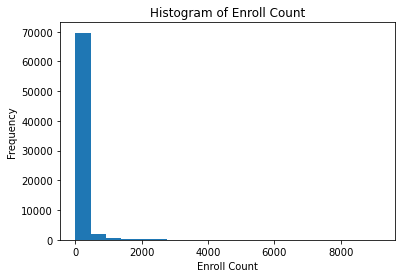

In [25]:
# EDA with target variable 'dropout_cnt'
plt.hist(data['enroll_cnt'], bins=20)
plt.xlabel('Enroll Count')
plt.ylabel('Frequency')
plt.title('Histogram of Enroll Count')
plt.show()

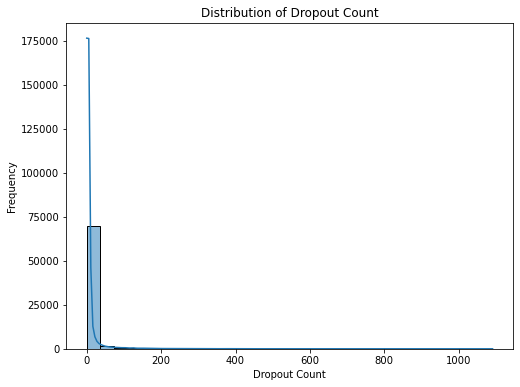

In [26]:
# Distribution of 'dropout_cnt'
plt.figure(figsize=(8, 6))
sns.histplot(data['dropout_cnt'], bins=30, kde=True)
plt.title('Distribution of Dropout Count')
plt.xlabel('Dropout Count')
plt.ylabel('Frequency')
plt.show()

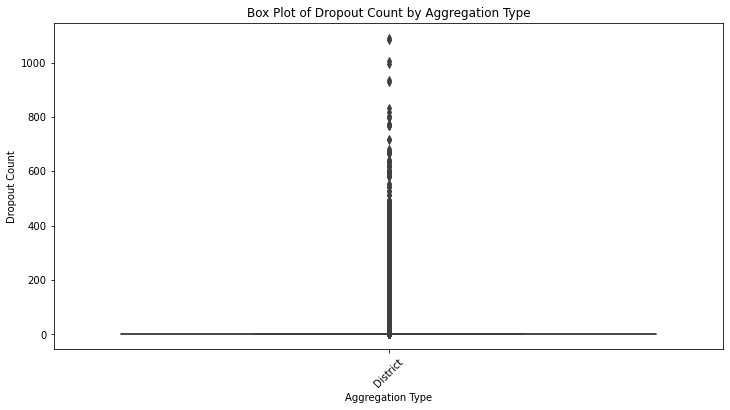

In [27]:
# Box plot of 'dropout_cnt' by 'aggregation_type'
plt.figure(figsize=(12, 6))
sns.boxplot(x='aggregation_type', y='dropout_cnt', data=data)
plt.title('Box Plot of Dropout Count by Aggregation Type')
plt.xticks(rotation=45)
plt.xlabel('Aggregation Type')
plt.ylabel('Dropout Count')
plt.show()

report_school_year            0
aggregation_index             0
aggregation_type              0
aggregation_name              0
nrc_code                      0
nrc_desc                      0
county_code                   0
county_name                   0
nyc_ind                       0
membership_desc               0
subgroup_code                 0
subgroup_name                 0
enroll_cnt                    0
grad_cnt                      0
grad_pct                      0
local_cnt                     0
local_pct                     0
reg_cnt                       0
reg_pct                       0
reg_adv_cnt                   0
reg_adv_pct                   0
non_diploma_credential_cnt    0
non_diploma_credential_pct    0
still_enr_cnt                 0
still_enr_pct                 0
ged_cnt                       0
ged_pct                       0
dropout_cnt                   0
dropout_pct                   0
dtype: int64


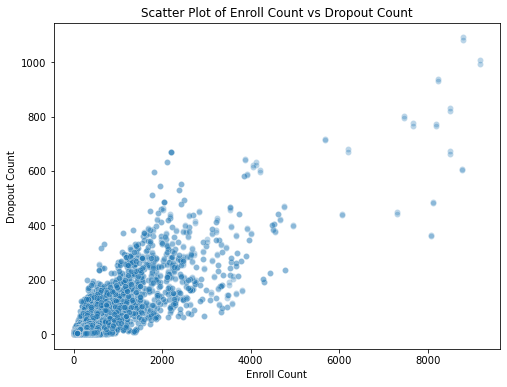

In [28]:
print(data.isnull().sum())
# Scatter plot of 'enroll_cnt' vs 'dropout_cnt'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='enroll_cnt', y='dropout_cnt', data=data, alpha=0.3)
plt.title('Scatter Plot of Enroll Count vs Dropout Count')
plt.xlabel('Enroll Count')
plt.ylabel('Dropout Count')
plt.show()

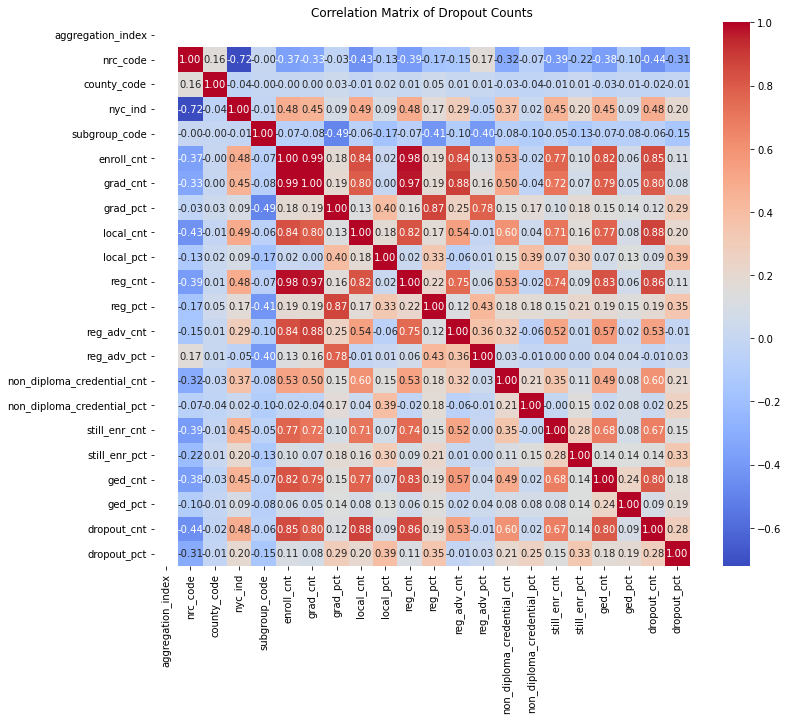

In [29]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Dropout Counts')
plt.show()

In [30]:
print(data.dtypes)

report_school_year             object
aggregation_index               int64
aggregation_type               object
aggregation_name               object
nrc_code                        int64
nrc_desc                       object
county_code                     int64
county_name                    object
nyc_ind                         int64
membership_desc                object
subgroup_code                   int64
subgroup_name                  object
enroll_cnt                    float64
grad_cnt                      float64
grad_pct                      float64
local_cnt                     float64
local_pct                     float64
reg_cnt                       float64
reg_pct                       float64
reg_adv_cnt                   float64
reg_adv_pct                   float64
non_diploma_credential_cnt    float64
non_diploma_credential_pct    float64
still_enr_cnt                 float64
still_enr_pct                 float64
ged_cnt                       float64
ged_pct     

# Feature Selection:
We manually select features based on domain knowledge or insights gained from exploratory data analysis (EDA).

The selected features are chosen because they are expected to have an impact on the target variable 'dropout_cnt' or are of interest for analysis.

We create a new DataFrame 'data_selected' that includes only the selected features for further analysis and modeling.

These steps are crucial for preparing the data and selecting relevant features that can contribute to building effective regression models to predict dropout counts.

In [31]:
# Define the selected features based on your domain knowledge
selected_features = [
    'nrc_desc',        # Type of school district
    'county_name',     # County name
    'enroll_cnt',      # Number of enrolled students
    'grad_pct',        # Graduation percentage
    'local_pct',       # Percentage of students awarded a "Local" diploma
    'reg_pct',         # Percentage of students awarded a "Regents" diploma
    'subgroup_name',   # Subgroup name
    'still_enr_pct'    # Percentage of students who did not graduate but were still enrolled
]

# Create a new DataFrame 'data_selected' by selecting the specified features
data_selected = data[selected_features]

# Check the updated dataset with selected features
data_selected.head()


,nrc_desc,county_name,enroll_cnt,grad_pct,local_pct,reg_pct,subgroup_name,still_enr_pct
0,Urban-Suburban High Needs,ALBANY,658.0,0.71,0.10,0.47,All Students,0.05
1,Urban-Suburban High Needs,ALBANY,324.0,0.76,0.09,0.52,Female,0.03
2,Urban-Suburban High Needs,ALBANY,334.0,0.65,0.10,0.42,Male,0.06
3,Urban-Suburban High Needs,ALBANY,66.0,0.00,0.00,0.00,American Indian/Alaska Native,0.00
4,Urban-Suburban High Needs,ALBANY,367.0,0.68,0.11,0.50,Black,0.05


In [32]:
# Display summary statistics of selected features
print(data_selected.describe())

         enroll_cnt      grad_pct     local_pct       reg_pct  still_enr_pct
count  73152.000000  73152.000000  73152.000000  73152.000000   73152.000000
mean     134.401247      0.457779      0.045991      0.235223       0.028152
std      330.049602      0.436085      0.087459      0.250189       0.070000
min        5.000000      0.000000      0.000000      0.000000       0.000000
25%       58.000000      0.000000      0.000000      0.000000       0.000000
50%       66.000000      0.600000      0.000000      0.200000       0.000000
75%       76.000000      0.900000      0.060000      0.450000       0.030000
max     9176.000000      1.000000      1.000000      1.000000       1.000000


In [33]:
data_selected.head()

,nrc_desc,county_name,enroll_cnt,grad_pct,local_pct,reg_pct,subgroup_name,still_enr_pct
0,Urban-Suburban High Needs,ALBANY,658.0,0.71,0.10,0.47,All Students,0.05
1,Urban-Suburban High Needs,ALBANY,324.0,0.76,0.09,0.52,Female,0.03
2,Urban-Suburban High Needs,ALBANY,334.0,0.65,0.10,0.42,Male,0.06
3,Urban-Suburban High Needs,ALBANY,66.0,0.00,0.00,0.00,American Indian/Alaska Native,0.00
4,Urban-Suburban High Needs,ALBANY,367.0,0.68,0.11,0.50,Black,0.05


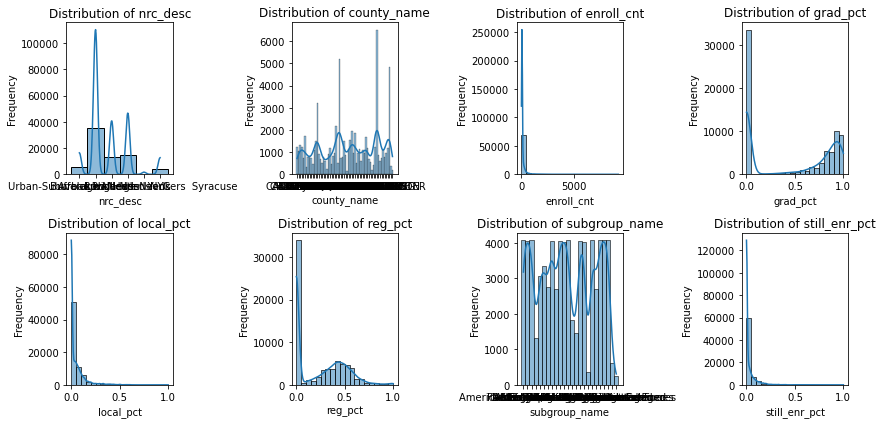

In [34]:
plt.figure(figsize=(12, 6))

for feature in selected_features:
    plt.subplot(2, 4, selected_features.index(feature) + 1)
    sns.histplot(data_selected[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

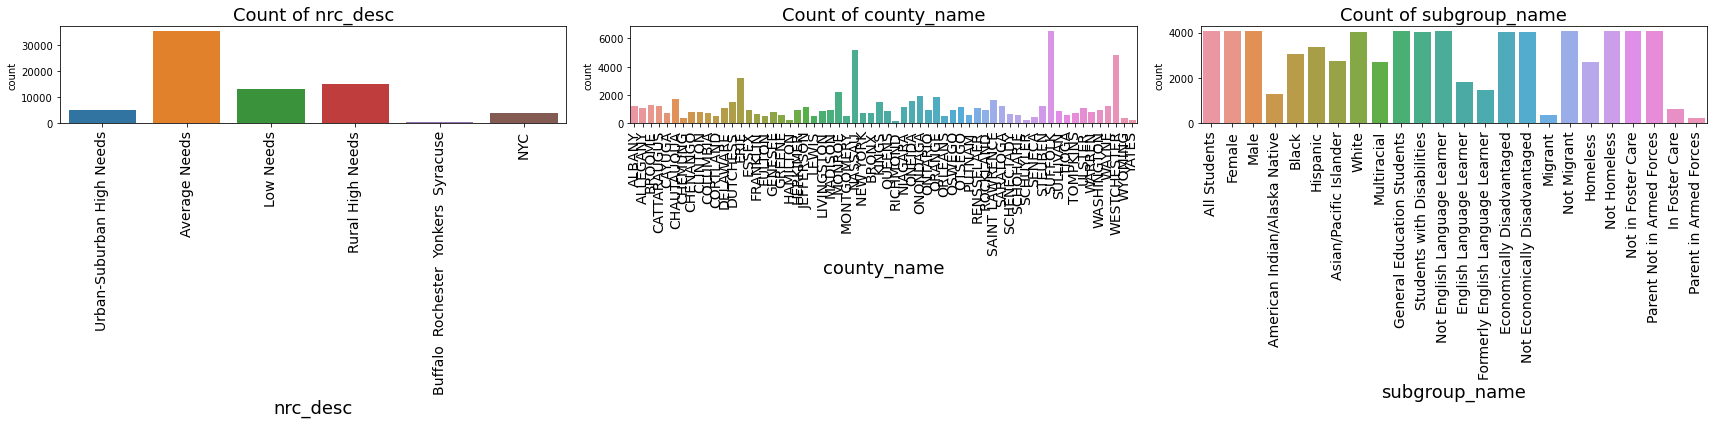

In [35]:
# Plot count plots for categorical features
categorical_features = ['nrc_desc', 'county_name', 'subgroup_name']

# Create a larger figure size
plt.figure(figsize=(24, 6))

for i, feature in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=data_selected, x=feature)
    plt.title(f'Count of {feature}', fontsize=18)
    plt.xlabel(feature, fontsize=18)
    plt.xticks(rotation=90, fontsize=14)  # Rotate x-axis labels for 'county_name'

# Adjust spacing between subplots
plt.subplots_adjust(wspace=50)

plt.tight_layout()
plt.show()

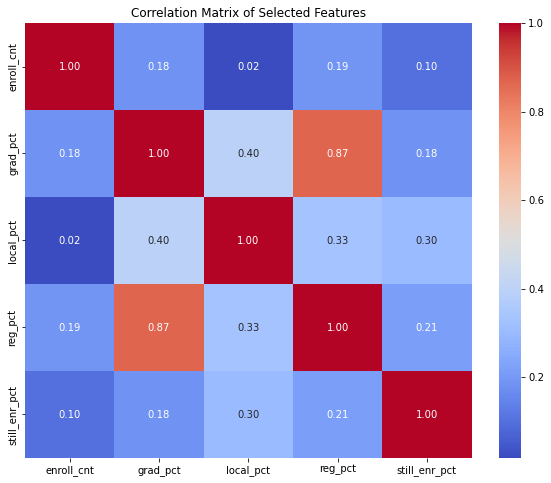

In [36]:
# Correlation matrix of selected features
corr_matrix = data_selected.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()

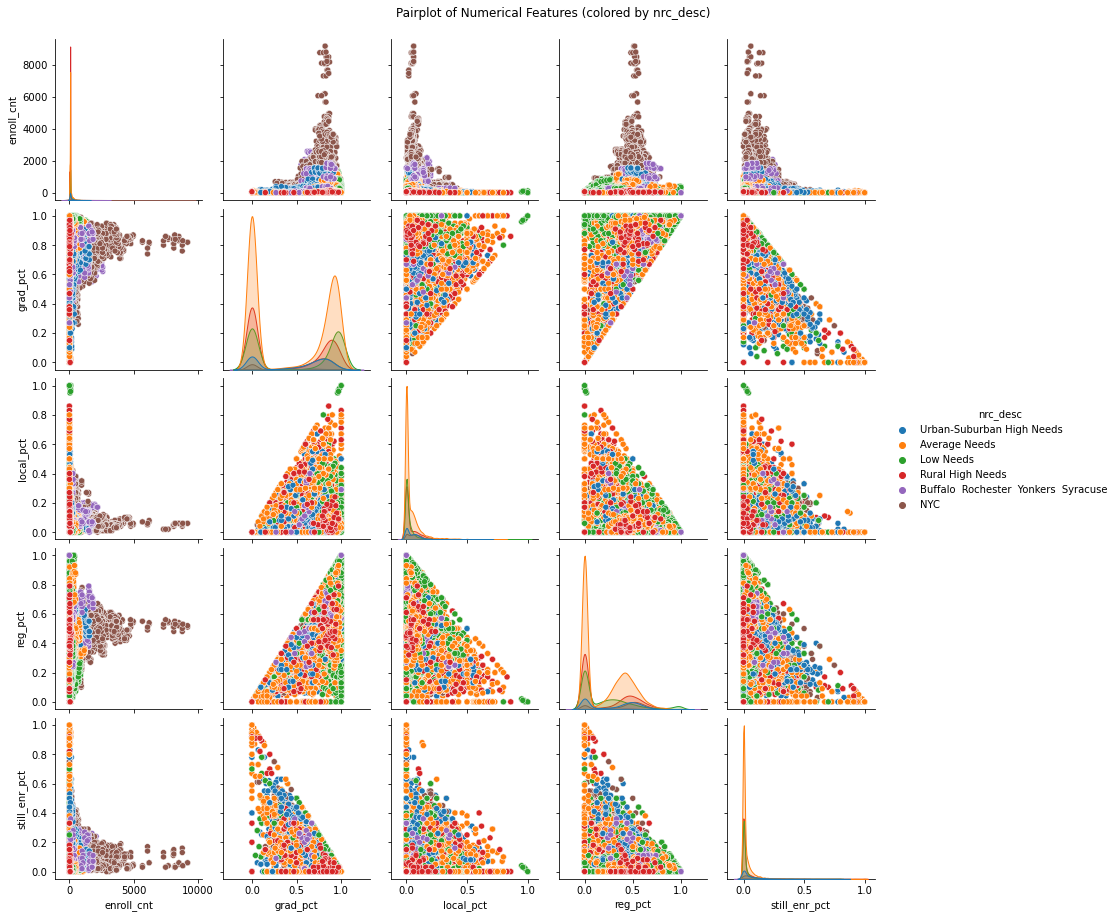

In [38]:
# Define the numerical features
numerical_features = [
    'enroll_cnt',
    'grad_pct',
    'local_pct',
    'reg_pct',
    'still_enr_pct'
]

# Pairplot for numerical features
sns.pairplot(data=data_selected, vars=numerical_features, diag_kind='kde', hue='nrc_desc')
plt.suptitle('Pairplot of Numerical Features (colored by nrc_desc)', y=1.02)
plt.show()

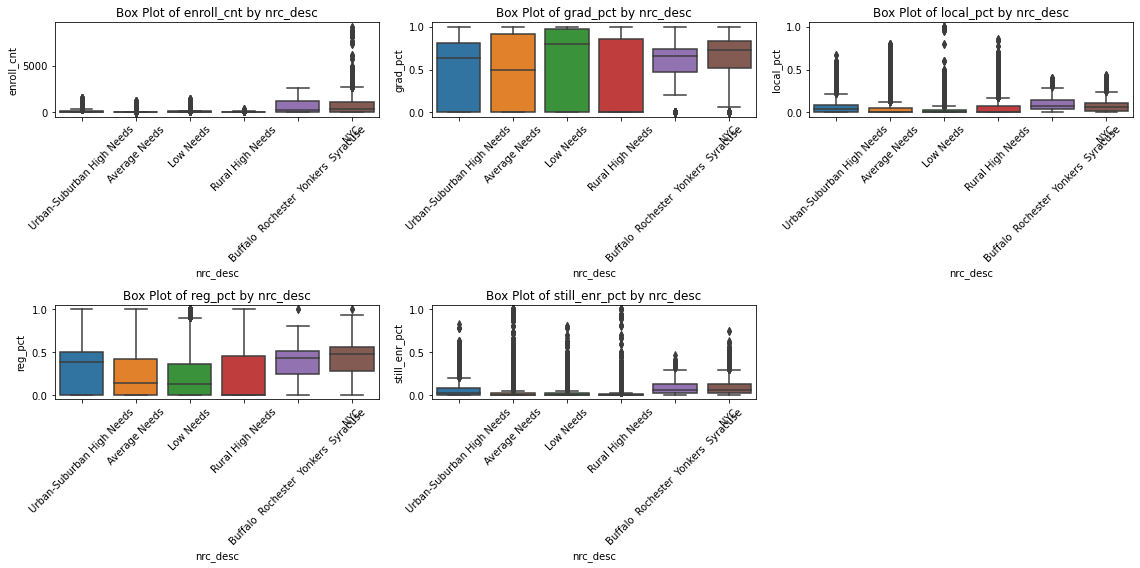

In [39]:
# Box plots for numerical features vs categorical features
plt.figure(figsize=(16, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=data_selected, x='nrc_desc', y=feature)
    plt.title(f'Box Plot of {feature} by nrc_desc')
    plt.xlabel('nrc_desc')
    plt.ylabel(feature)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

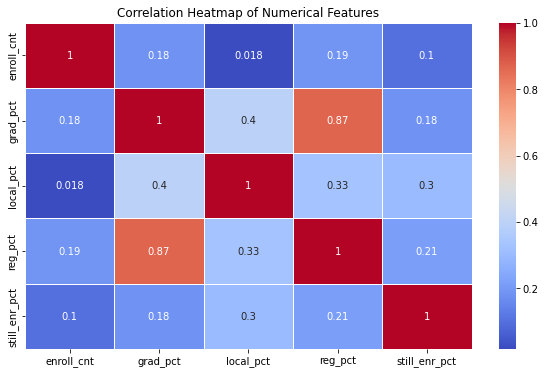

In [40]:
# Heatmap to visualize correlations between numerical features
correlation_matrix = data_selected[numerical_features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Feature Selection Explanation:

nrc_desc' (Type of School District): The type of school district can have a significant impact on dropout rates. Different types of districts may have varying resources, support systems, and policies that influence student outcomes.

'county_name' (County Name): The county in which a school district is located can also be an important factor. Socioeconomic factors, local community support, and educational resources can vary between counties and affect dropout rates.

'enroll_cnt' (Number of Enrolled Students): The total number of enrolled students in a school district provides context for understanding the scale and size of the district. Larger districts may have different dropout dynamics than smaller ones.

'grad_pct' (Graduation Percentage): This column represents the percentage of students who graduated from the school district. It's a critical indicator of student success and directly related to dropout rates.

'local_pct' (Percentage of Students Awarded a "Local" Diploma): The type of diploma awarded (local, Regents, etc.) can provide insights into the educational standards of the district and how they may influence dropout rates.

'reg_pct' (Percentage of Students Awarded a "Regents" Diploma): Similar to 'local_pct,' this column provides information about the type of diploma awarded and the district's academic rigor.

'subgroup_name' (Subgroup Name): Different student subgroups (e.g., based on gender, ethnicity, language proficiency) may experience varying dropout rates. Understanding how dropout rates vary among subgroups is important for addressing educational disparities.

'still_enr_pct' (Percentage of Students Who Did Not Graduate but Were Still Enrolled): This column indicates the percentage of students who did not graduate but were still enrolled in the district. It provides insights into the persistence of students who may be at risk of dropping out.

These selected columns encompass a range of factors that can influence dropout rates, including the district's characteristics, the academic performance of students, and the presence of disparities among different student subgroups. By including these columns in feature selection, you aim to build a model that considers the most relevant and informative features for predicting dropout counts.

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, PoissonRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
from patsy import dmatrices
import statsmodels.formula.api as smf

# 5. Regression Modeling
Construct multiple linear regression models, two Poisson models and two negative binomial regression models.   
Choose the better one from each of three kinds of models using cross validation.  
Use R square score to determine the model I select.
## 5.1 Two linear regression models
Construct two linear regression models using different explanatory variables and use cross validation to choose the better one.

In [ ]:
select_col1 = ['local_pct','reg_pct','subgroup_name','still_enr_pct']
# select_col2 = ['nrc_desc','county_name','enroll_cnt','grad_pct']
select_col2 = ['nrc_desc','county_name','enroll_cnt','grad_pct','still_enr_pct','local_pct','subgroup_name','reg_pct']
X1 = data[select_col1]
X1 = pd.get_dummies(X1,columns=['subgroup_name'],drop_first=True)
X2 = data[select_col2]
X2 = pd.get_dummies(X2,columns=['nrc_desc','county_name','subgroup_name'],drop_first=True)

get two train data sets: X1 and X2.

In [ ]:
data['dropout_cnt'] = data['dropout_cnt'].astype(int)

In [ ]:
y = data['dropout_cnt']

In [ ]:
X1_train, X1_test, y_train, y_test = train_test_split(X1,y,random_state=5)
X2_train, X2_test, y_train, y_test = train_test_split(X2,y,random_state=5)

split data sets into train sets and test sets.

### Use cross validation to compare two models

In [ ]:
# define model
lr1 = LinearRegression()
score1 = cross_val_score(lr1,X1_train,y_train,cv=10)
score1.mean()

In [ ]:
lr2 = LinearRegression()
score2 = cross_val_score(lr2,X2_train,y_train,cv=10)
score2.mean()

The lr1 model is so bad that its score is 0.07. So I choose the lr2 model and just calculate the r square of lr2 model.
### Calculate R square score
Use rounding to make the predicted result a whole number as the response variable is a count number.

In [ ]:
# train model
lr2.fit(X2_train,y_train)
# convert float result into int
y2_pre = []
for i in lr2.predict(X2_test):
    if i % 1 >= 0.5:
        y2_pre.append(int(i)+1)
    else:
        y2_pre.append(int(i))
# mean_squared_error(y_test,y1_pre)
r2_score(y_test,y2_pre)

The r square score is 0.81, which means the model is not bad.

## 5.2 Two Poisson regression models
Construct two Poisson regression models: a Poisson regression model and a Zero-Inflated Poisson regression model. And then use choose the better one.
### Poisson regression model
It is designed to predict the response variable whose values are count numbers.  
Using Poisson regression model, we assume the mean of response variable is equal to its variance.

In [ ]:
data_pr = data[['nrc_desc','county_name','enroll_cnt','grad_pct','still_enr_pct','local_pct','subgroup_name','reg_pct','dropout_cnt']]

In [ ]:
# set a random seed
np.random.seed(0)
# rand(n): create n length array whose values are from 0 to 1
# mask is an array whose values are bool type representing if the value is less than 0.7
mask = np.random.rand(len(data)) < 0.7
mask.sum()/len(data)

Train set takes up 70% of entire data.

In [ ]:
# get rows by bool
data_train = data_pr[mask]
# eg. ~True == False
data_test = data_pr[~mask]
# formula
expr = """dropout_cnt ~ nrc_desc  + county_name + enroll_cnt + grad_pct + still_enr_pct + local_pct + subgroup_name + reg_pct"""

# dmatrices function completes:
# 1.add constant into X
# 2.transform category into dummy variables
# The first outcome is y, and the second is X
y_train, X_train = dmatrices(expr, data_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, data_test, return_type='dataframe')

Now we get the train and test data sets.

In [ ]:
pr1 = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
pr1.summary()

Pseudo R-square is 1. It may indicate that the model does not provide a better fit than a simple averaged model.

In [ ]:
pr_y1_pre = pr1.get_prediction(X_test)

In [ ]:
pr_y1_pre.summary_frame()

Think the "mean" is the predicted value, then use r2_score to calculate the r square.

In [ ]:
y1_pre = []
# convert float result into int
for i in pr_y1_pre.summary_frame()['mean']:
    if i % 1 >= 0.5:
        y1_pre.append(int(i)+1)
    else:
        y1_pre.append(int(i))

r2_score(y_test, y1_pre)

R square is 0.785, which is a little less than the second linear model.

### Zero-Inflated Poisson regression model
If there are more than expected zero values in the response variable, we can use Zero-Inflated Poisson regression model.  
In fact, it uses a logistic regression model to predict uncommon zero values before poisson regression model.

In [ ]:
len(data[data['dropout_cnt'] == 0])/len(data)

10% of the data values are zero. It may be a little too much, so I'd like to try a Zero-Inflated Poisson regression model using same X and y.

In [ ]:
# max iteration is 200
pr2 = sm.ZeroInflatedPoisson(y_train,X_train).fit(maxiter=200)
pr2.summary()

Pseudo R-square is 0.75.  
We can see p values of many features are more than 0.05, which means the result may be better to drop these features.

In [ ]:
y2_pre = []
# convert float result into int
for i in pr2.predict(X_test):
    if i % 1 >= 0.5:
        y2_pre.append(int(i)+1)
    else:
        y2_pre.append(int(i))

r2_score(y_test, y2_pre)

The R square of the Zero-Inflated Poisson regression model is 0.79.  
It seem that using Zero-Inflated Poisson regression model doesn't have an obvious improvement compared to general regression model. However, it obviously increases the model complexity.  
So, I choose the general regression model as the better one.

## 5.3 Two negative binomial regression models
Negative binomial regression is also used to predict count numbers. But compared to Poisson regression, it doesn't have the requirement that mean of the response variable is equal to its variance.  
In fact, negative binomial regression adds a parameter to represent the dispersion of the response variable. If the response variable meet the conditions for Poisson regression, the parameter will be zero and the results of negative binomial regression and Poisson regression are the same.
### The first negative binomial regression models

In [ ]:
# data_nbr = data[['nrc_desc','county_name','enroll_cnt','grad_pct','still_enr_pct','local_pct','subgroup_name','reg_pct','dropout_cnt']]
# data_nbr = data[['nrc_desc','county_name','grad_pct','still_enr_pct','local_pct','reg_pct','dropout_cnt']]  good one
# data_nbr = data[['nrc_desc','county_name','grad_pct','still_enr_pct','local_pct','reg_pct','dropout_cnt']] 0.35
data_nbr = data[['nrc_desc','county_name','grad_pct','still_enr_pct','local_pct','reg_pct','dropout_cnt','subgroup_name']]
# set a random seed
np.random.seed(10)
# rand(n): create n length array whose values are from 0 to 1
# mask is an array whose values are bool type representing if the value is less than 0.7
mask = np.random.rand(len(data)) < 0.8
mask.sum()/len(data)

Train set takes up 70% of entire data.

In [ ]:
# get rows by bool
data_train = data_nbr[mask]
# eg. ~True == False
data_test = data_nbr[~mask]
# formula
expr = """dropout_cnt ~ county_name+ nrc_desc + grad_pct + still_enr_pct + local_pct + reg_pct + subgroup_name"""

# dmatrices function completes:
# 1.add constant into X
# 2.transform category into dummy variables
# The first outcome is y, and the second is X
y_train, X_train = dmatrices(expr, data_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, data_test, return_type='dataframe')

##### get fitted rates λ
To get the λ, we should first train Poisson model

In [ ]:
# take some time
nbr1 = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
nbr1.summary()

In [ ]:
rate = nbr1.mu
rate

##### get the value of α
To get the value of α, we should fit the aux OLS regression model

In [ ]:
data_train['LAMBDA'] = rate
data_train['AUX_OLS_DEP'] = data_train.apply(lambda x: ((x['dropout_cnt'] - x['LAMBDA'])**2 - x['LAMBDA']) / x['LAMBDA'], axis=1)

In [ ]:
ols_expr = """AUX_OLS_DEP ~ LAMBDA - 1"""

AUX_OLS_DEP is the dependent variable and it is explained by LAMBDA (which is the rate vector λ). The ‘-1’ at the end of the expression is patsy syntax for saying: do not to use an intercept of regression

In [ ]:
aux_olsr_results = smf.ols(ols_expr, data_train).fit()

In [ ]:
aux_olsr_results.params

The α is 0.46.  
If the value of α is statistically not significant, then the Negative Binomial regression model cannot do a better job of fitting the training data set than a Poisson regression model.  

In [ ]:
aux_olsr_results.tvalues

From a t-value calculator, we can see that the critical t-value at a 99% confidence level (right-tailed), and degrees of freedom=50000 is 2.326422, which is less than the t-statistic of α which is 54.   
So, we conclude that this α is statistically significant.

##### Use the α to fit the NB2 regression model

In [ ]:
# take some time
nbr1 = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()

In [ ]:
nbr1.summary()

The Pseudo R-squqre is 0.94. The model fits well.

##### make prediction

In [ ]:
nbr1_pre = nbr1.get_prediction(X_test)
nbr1_pre.summary_frame()

##### R square score

In [ ]:
y1_pre = []
# convert float result into int
for i in nbr1_pre.summary_frame()['mean']:
    if i % 1 >= 0.5:
        y1_pre.append(int(i)+1)
    else:
        y1_pre.append(int(i))

r2_score(y_test, y1_pre)

### The second negative binomial regression models

In [ ]:
data_nbr = data[['enroll_cnt','grad_pct','still_enr_pct','local_pct','reg_pct','dropout_cnt']]
np.random.seed(10)
# rand(n): create n length array whose values are from 0 to 1
# mask is an array whose values are bool type representing if the value is less than 0.7
mask = np.random.rand(len(data)) < 0.8

# get rows by bool
data_train = data_nbr[mask]
# eg. ~True == False
data_test = data_nbr[~mask]
# formula
expr = """dropout_cnt ~ enroll_cnt + grad_pct + still_enr_pct + local_pct + reg_pct"""

# dmatrices function completes:
# 1.add constant into X
# 2.transform category into dummy variables
# The first outcome is y, and the second is X
y_train, X_train = dmatrices(expr, data_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, data_test, return_type='dataframe')

##### get fitted rates λ
To get the λ, we should first train Poisson model

In [ ]:
# take some time
nbr2 = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
rate = nbr2.mu

##### get the value of α
To get the value of α, we should fit the aux OLS regression model

In [ ]:
data_train['LAMBDA'] = rate
data_train['AUX_OLS_DEP'] = data_train.apply(lambda x: ((x['dropout_cnt'] - x['LAMBDA'])**2 - x['LAMBDA']) / x['LAMBDA'], axis=1)
ols_expr = """AUX_OLS_DEP ~ LAMBDA - 1"""

AUX_OLS_DEP is the dependent variable and it is explained by LAMBDA (which is the rate vector λ). The ‘-1’ at the end of the expression is patsy syntax for saying: do not to use an intercept of regression

In [ ]:
aux_olsr_results2 = smf.ols(ols_expr, data_train).fit()
aux_olsr_results2.params

In [ ]:
aux_olsr_results2.tvalues

The α is 0.8.  
From a t-value calculator, we can see that the critical t-value at a 99% confidence level (right-tailed), and degrees of freedom=50000 is 2.3, which is less than the t-statistic of α which is 68.9.
So, we conclude that this α is statistically significant.

##### Use the α to fit the NB2 regression model

In [ ]:
# take some time
nbr2 = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha=aux_olsr_results2.params[0])).fit()
nbr2.summary()

The Pseudo R-square is 0.82.

##### make prediction

In [ ]:
nbr2_pre = nbr2.get_prediction(X_test)
nbr2_pre.summary_frame()

##### R square score

In [ ]:
y2_pre = []
# convert float result into int
for i in nbr2_pre.summary_frame()['mean']:
    if i % 1 >= 0.5:
        y2_pre.append(int(i)+1)
    else:
        y2_pre.append(int(i))

r2_score(y_test, y2_pre)

It's too bad.

# 6. Select models
## Multiple Linear Regressions
- model1 (r square): 0.07
- model2 (r square): 0.79

The second model is better than the first from R square score, so I choose the second model.
## Poisson Regressions
- General Poisson Regressions (r square): 0.785
- Zero Inflated Poisson regression (r square): 0.79

Zero-Inflated Poisson regression model doesn't have an obvious improvement compared to general regression model. However, it obviously increases the model complexity.  
So, I choose the general regression model as the better one.
## Negative Binomal Regressions 
- model1 (r square): 0.5
- model2 (r square): too bad (negative)

The first model is better than the second from R square score, so I choose the first model.

## There are three models in the "final round": 
- The second Multiple Linear Regression
- General Poisson Regression
- The first Negative Binomal Regression

The General Poisson Regression and the first Negative Binomal Regression don't have obvious improvements on model performance but obviously increase the model complexity.  
So I will select the second multiple linear regression model as my preferred model.

# Conclusion :

This project provides a predictive model for student dropout counts in New York State school districts, which can be valuable for educational institutions and policymakers in identifying and addressing dropout challenges. Further enhancements and refinements of the model could lead to more accurate predictions and better insights into the factors influencing student dropout rates.

The selected features for modeling were chosen based on domain knowledge and insights gained from EDA. These features included characteristics of school districts, enrollment counts, graduation percentages, and other relevant factors.

The model selection process led us to the second Multiple Linear Regression model as the preferred choice, with an R-squared score of 0.79. This model performed well in predicting student dropout counts, demonstrating its effectiveness in this context.

While Poisson and Negative Binomial Regression models were considered, they did not provide significant improvements in model performance and introduced additional complexity. Therefore, the Multiple Linear Regression model was chosen as the final model.

